# Jupyter notebook to test MLFF models 

In [61]:
import inference_functions as ifs
import importlib
import pandas as pd

In [75]:
importlib.reload(ifs)

<module 'inference_functions' from '/mnt/e/Documents/GitHub/MLFF_training/Inference/inference_functions.py'>

## Oxygen Crystal structure prediction test

### Parse test set

In [79]:
filepath = '/home/nacho/NbOC/vasp/test_set/O/'
atoms_list,opt_atoms_list = ifs.read_dft(filepath,mlff_opt=True)

Processing:   6%|█████▏                                                                             | 17/271 [00:01<00:35,  7.16it/s]/home/nacho/miniconda3/envs/general/lib/python3.10/site-packages/ase/io/vasp_parsers/vasp_outcar_parsers.py:344: UserWarning: Found badly formatted stress line. Setting stress to None.
  warn('Found badly formatted stress line. Setting stress to None.')
Processing:  94%|█████████████████████████████████████████████████████████████████████████████▍    | 256/271 [00:22<00:01, 11.58it/s]


In [72]:
atoms_list[1].info

{'file': '/home/nacho/NbOC/vasp/test_set/O/206',
 'step': 'first step',
 'mlff_opt_energy': -51.314409255981445}

### Run inference using MLFF

In [80]:
df_0407= ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/04-07-2024/bestE_epoch38_e888_f7250_s3257_mNA.pth.tar',mlff_opt = True)

Running CHgnet


In [6]:
df_0407= ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/04-07-2024/bestE_epoch38_e888_f7250_s3257_mNA.pth.tar')
df_0415 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/04-15-2024/bestE_epoch34_e114_f323_s1109_mNA.pth.tar')
df_0429 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/04-29-2024/bestE_epoch40_e54_f723_s1061_mNA.pth.tar')
df_0529 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/relaxed_052924-290524.p/bestE_epoch26_e383_f495_s1317_mNA.pth.tar')
df_0415 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/04-15-2024/bestE_epoch34_e114_f323_s1109_mNA.pth.tar')
df_long68 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/long_68_aimd-120524/bestE_epoch20_e2_f52_s37_mNA.pth.tar')
df_long0526 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/data_052624_mixed-290524.p/bestE_epoch28_e56_f272_s755_mNA.pth.tar')
df_all = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/all_AIMD_52424-240524.p/bestE_epoch32_e4_f87_s330_mNA.pth.tar')
df_061024 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/all_data_060924-090624.p/bestE_epoch43_e82_f300_s1347_mNA.pth.tar')
df_binary = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/binary_061024-100624.p/bestE_epoch45_e5_f87_s170_mNA.pth.tar')
df_mace = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/MACE/2024-01-07-mace-128-L2_epoch-199.model',mace_flag=True)
df_clean_relaxed = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/MACE/clean_relaxed.model',mace_flag=True)
all_data_1 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/2024-06-21_20-04-35/bestE_epoch44_e69_f271_s1361_mNA.pth.tar')
all_data_2 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/2024-06-21_20-04-37/bestE_epoch28_e71_f276_s1349_mNA.pth.tar')
all_data_3 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/2024-06-21_20-04-42/bestE_epoch37_e70_f813_s1407_mNA.pth.tar' )       


Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running MACE
Running MACE
Running CHgnet
Running CHgnet
Running CHgnet


### Example of a MLFF model Dataframe 

In [81]:
df_0407

,File,DFT E,Opt Δ (DFT),MLFF E,ΔE,Opt ΔE (MLFF),Opt ΔΔE,Forces MSE,natom,DFT Rank,MLFF Rank,Rank ρ
0,149,-4.478,0.242,-4.751,0.273,0.185,0.056,0.350,6,1.0,1.0,0.960031
1,270,-4.263,0.292,-3.780,-0.484,0.489,-0.197,1.396,6,2.0,29.0,0.960031
2,295,-4.168,0.728,-4.207,0.038,0.632,0.096,0.343,6,3.0,11.0,0.960031
3,35,-4.165,0.443,-4.567,0.402,0.201,0.241,3.164,6,4.0,2.0,0.960031
4,121,-4.136,0.147,-4.469,0.333,0.149,-0.002,0.363,6,5.0,3.0,0.960031
...,...,...,...,...,...,...,...,...,...,...,...,...
251,203,52.412,47.017,51.840,0.572,48.742,-1.725,24.113,6,252.0,254.0,0.960031
252,83,60.455,53.321,37.488,22.967,37.814,15.507,0.000,6,253.0,252.0,0.960031
253,287,64.614,55.268,32.216,32.398,30.994,24.274,0.000,6,254.0,251.0,0.960031
254,57,96.697,95.196,59.574,37.123,59.104,36.092,5.570,6,255.0,255.0,0.960031


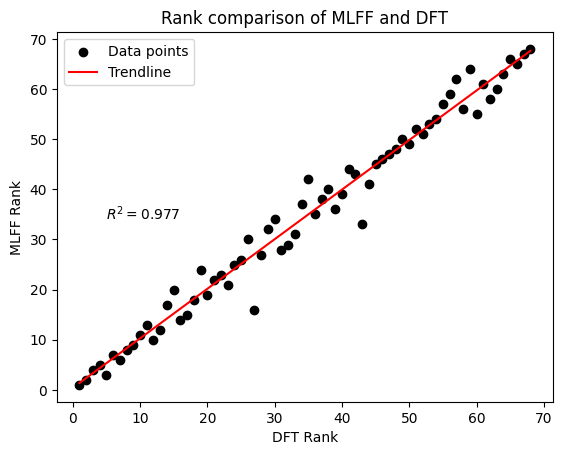

In [47]:
ifs.plot_mlff_dft_rank(all_data_1)

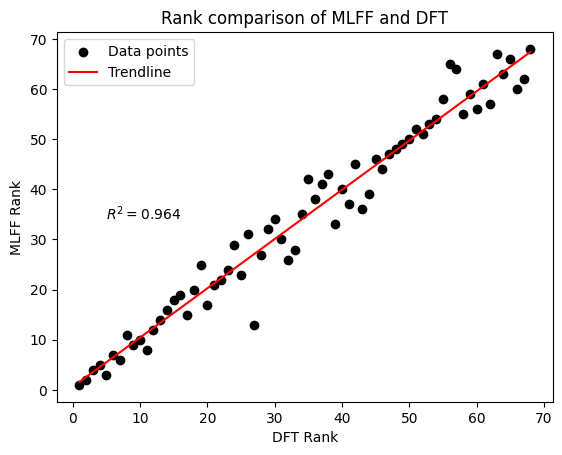

In [48]:
ifs.plot_mlff_dft_rank(df_all)

## Carbon Crystal structure Test

In [10]:
filepath = '/home/nacho/NbOC/vasp/test_set/C/'
atoms_list,opt_atoms_list = ifs.read_dft(filepath)
df_all = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/all_AIMD_52424-240524.p/bestE_epoch32_e4_f87_s330_mNA.pth.tar')
all_data_1 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/2024-06-21_20-04-35/bestE_epoch44_e69_f271_s1361_mNA.pth.tar')
df_clean_relaxed = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/MACE/clean_relaxed.model',mace_flag=True)

Processing:  11%|████████▉                                                                          | 12/111 [00:00<00:03, 27.10it/s]/home/nacho/miniconda3/envs/general/lib/python3.10/site-packages/ase/io/vasp_parsers/vasp_outcar_parsers.py:344: UserWarning: Found badly formatted stress line. Setting stress to None.
  warn('Found badly formatted stress line. Setting stress to None.')
Processing:  91%|██████████████████████████████████████████████████████████████████████████▌       | 101/111 [00:03<00:00, 27.30it/s]


Running CHgnet
Running CHgnet
Running MACE


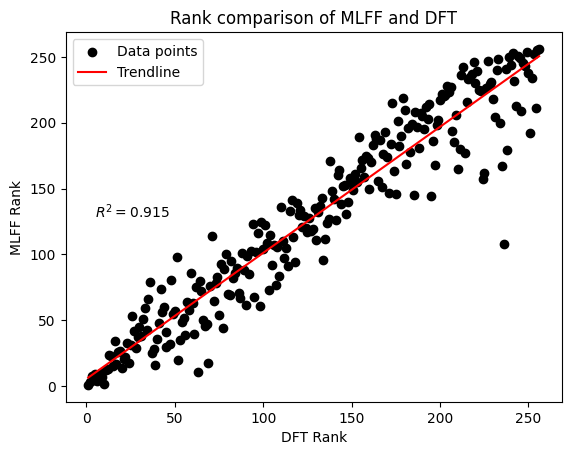

In [11]:
ifs.plot_mlff_dft_rank(all_data_2)

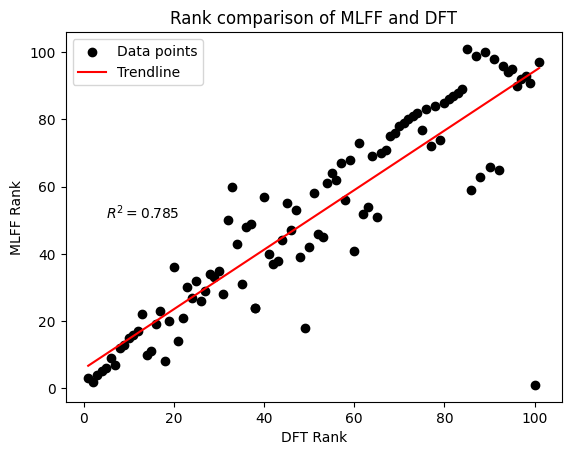

In [12]:
ifs.plot_mlff_dft_rank(df_all)

## NbC crystal structure test

In [18]:
filepath = '/home/nacho/NbOC/vasp/test_set/NbC/'
atoms_list,opt_atoms_list = ifs.read_dft(filepath)
df_all = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/all_AIMD_52424-240524.p/bestE_epoch32_e4_f87_s330_mNA.pth.tar')
all_data_1 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/2024-06-21_20-04-35/bestE_epoch44_e69_f271_s1361_mNA.pth.tar')
df_clean_relaxed = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/MACE/clean_relaxed.model',mace_flag=True)

Processing:   4%|███▎                                                                                | 5/127 [00:00<00:13,  8.84it/s]

Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/348/OUTCAR
Error details: Incomplete OUTCAR


Processing:   6%|█████▎                                                                              | 8/127 [00:01<00:14,  8.11it/s]

Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/389/OUTCAR
Error details: Incomplete OUTCAR


Processing:  15%|████████████▍                                                                      | 19/127 [00:01<00:07, 15.26it/s]

Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/310/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/371/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/379/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/351/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/346/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/294/OUTCAR
Error details: Incomplete OUTCAR


Processing:  17%|██████████████▍                                                                    | 22/127 [00:01<00:06, 15.43it/s]

Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/384/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/322/OUTCAR
Error details: Incomplete OUTCAR


Processing:  20%|████████████████▎                                                                  | 25/127 [00:02<00:12,  8.08it/s]

Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/337/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/296/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/354/OUTCAR
Error details: Incomplete OUTCAR


Processing:  24%|███████████████████▌                                                               | 30/127 [00:03<00:11,  8.17it/s]

Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/289/OUTCAR
Error details: Incomplete OUTCAR


Processing:  31%|██████████████████████████▏                                                        | 40/127 [00:04<00:07, 11.90it/s]

Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/386/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/302/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/382/OUTCAR
Error details: Incomplete OUTCAR


Processing:  34%|████████████████████████████                                                       | 43/127 [00:04<00:06, 12.40it/s]

Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/299/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/362/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/353/OUTCAR
Error details: Incomplete OUTCAR


Processing:  40%|█████████████████████████████████▎                                                 | 51/127 [00:05<00:08,  8.87it/s]

Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/370/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/359/OUTCAR
Error details: Incomplete OUTCAR


Processing:  46%|█████████████████████████████████████▉                                             | 58/127 [00:06<00:09,  7.51it/s]

Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/329/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/343/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/397/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/380/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/381/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/366/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/358/OUTCAR
Error details: Incomplete OUTCAR


Processing:  57%|███████████████████████████████████████████████                                    | 72/127 [00:07<00:05,  9.73it/s]

Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/231/OUTCAR
Error details: [Errno 2] No such file or directory: '/home/nacho/NbOC/vasp/test_set/NbC/231/OUTCAR'
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/325/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/288/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/331/OUTCAR
Error details: Incomplete OUTCAR


Processing:  61%|██████████████████████████████████████████████████▎                                | 77/127 [00:08<00:04, 10.22it/s]

Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/332/OUTCAR
Error details: Incomplete OUTCAR


Processing:  65%|█████████████████████████████████████████████████████▌                             | 82/127 [00:08<00:03, 11.50it/s]

Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/367/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/388/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/360/OUTCAR
Error details: Incomplete OUTCAR


Processing:  68%|████████████████████████████████████████████████████████▏                          | 86/127 [00:08<00:03, 12.57it/s]

Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/356/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/311/OUTCAR
Error details: Incomplete OUTCAR


Processing:  75%|██████████████████████████████████████████████████████████████                     | 95/127 [00:10<00:03,  9.95it/s]

Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/313/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/295/OUTCAR
Error details: Incomplete OUTCAR


Processing:  76%|███████████████████████████████████████████████████████████████▍                   | 97/127 [00:10<00:03,  8.61it/s]/home/nacho/miniconda3/envs/general/lib/python3.10/site-packages/ase/io/vasp_parsers/vasp_outcar_parsers.py:344: UserWarning: Found badly formatted stress line. Setting stress to None.
  warn('Found badly formatted stress line. Setting stress to None.')
Processing:  84%|█████████████████████████████████████████████████████████████████████             | 107/127 [00:10<00:01, 19.11it/s]

Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/312/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/301/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/341/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/328/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/168/OUTCAR
Error details: could not convert string to float: '-0.0000006650526.346114'
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/330/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/387/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/350/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/316/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/320/OUTCAR


Processing:  89%|████████████████████████████████████████████████████████████████████████▉         | 113/127 [00:10<00:00, 19.73it/s]

Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/297/OUTCAR
Error details: Incomplete OUTCAR


Processing:  91%|██████████████████████████████████████████████████████████████████████████▉       | 116/127 [00:11<00:00, 15.77it/s]

Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/372/OUTCAR
Error details: Incomplete OUTCAR


Processing:  96%|██████████████████████████████████████████████████████████████████████████████▊   | 122/127 [00:11<00:00, 16.53it/s]

Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/336/OUTCAR
Error details: Incomplete OUTCAR
Error reading file: /home/nacho/NbOC/vasp/test_set/NbC/345/OUTCAR
Error details: Incomplete OUTCAR


Processing:  99%|█████████████████████████████████████████████████████████████████████████████████▎| 126/127 [00:11<00:00, 10.82it/s]


Running CHgnet
Running CHgnet
Running MACE


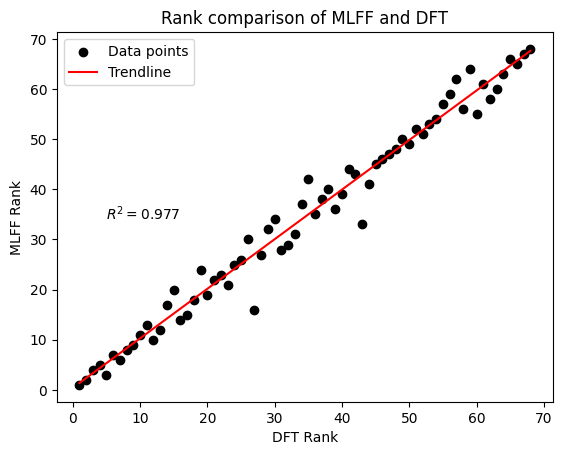

In [19]:
ifs.plot_mlff_dft_rank(all_data_1)

## NbO crystal structure Test

In [13]:
filepath = '/home/nacho/NbOC/vasp/test_set/NbO/'
atoms_list,opt_atoms_list = ifs.read_dft(filepath)
df_all = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/all_AIMD_52424-240524.p/bestE_epoch32_e4_f87_s330_mNA.pth.tar')
all_data_1 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/2024-06-21_20-04-35/bestE_epoch44_e69_f271_s1361_mNA.pth.tar')
df_clean_relaxed = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/MACE/clean_relaxed.model',mace_flag=True)

Processing:  87%|████████████████████████████████████████████████████████████████████████▌          | 90/103 [00:01<00:00, 69.83it/s]


Running CHgnet
Running CHgnet
Running MACE


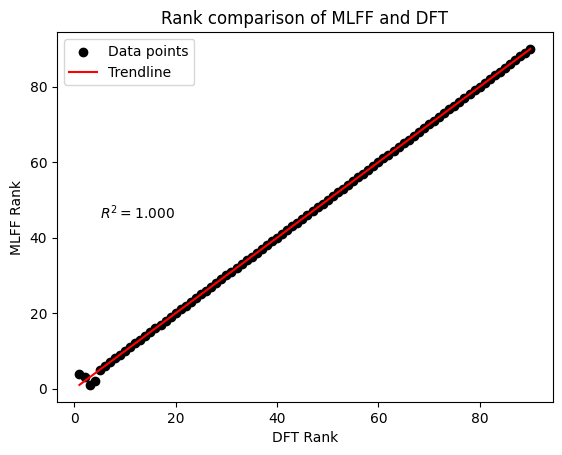

In [14]:
ifs.plot_mlff_dft_rank(all_data_1)

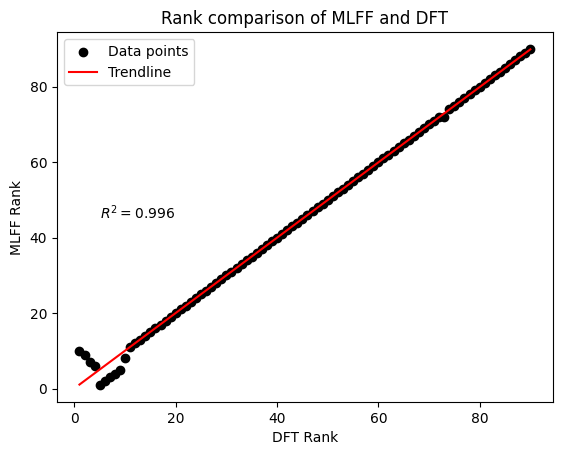

In [15]:
ifs.plot_mlff_dft_rank(df_all)

## Graphs comparing inference on a test set

In [20]:
dataframes = [df_0407,df_0415,df_0429,df_0529,df_0415,df_long68,df_long0526,df_061024,df_clean_relaxed,all_data_1,all_data_2,all_data_3]
dataframe_names = ['April 4th', 'April 15th','April 29th', 'May 29th','AIMD','May 26 mixed','All AIMD','June 10th','Clean relaxed MACE','All data 1','All data 2','All data 3']

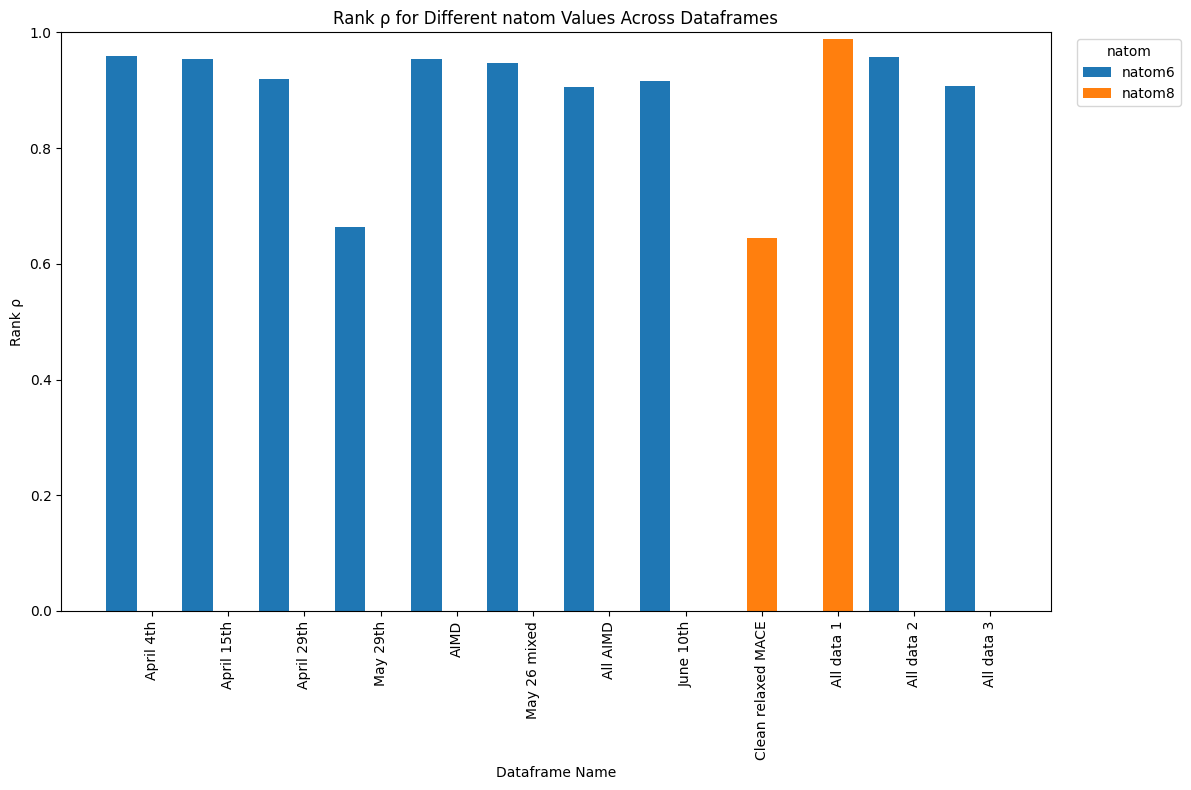

In [21]:
ifs.plot_rank_correlation(dataframes,dataframe_names)

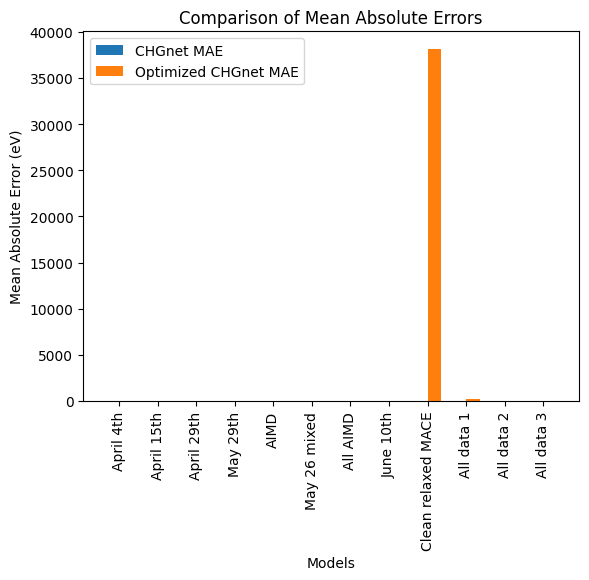

In [22]:
ifs.plot_mae_comparison(dataframes,dataframe_names)

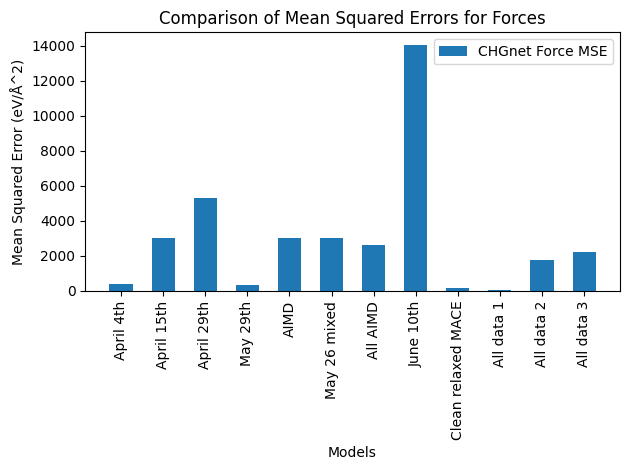

In [23]:
ifs.plot_mse_comparison(dataframes,dataframe_names)

## Running Geometry optimization with Chgnet

### June 21st model on natoms64 NbOC

In [ ]:
model_path = '/home/nacho/NbOC/CHGnet/2024-06-21_20-04-35/bestE_epoch44_e69_f271_s1361_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/VASP/test_set/finished_calcs/struct3_natom64/OUTCAR'
traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)
ifs.optimization_summary(struct,last_struct)
ifs.plot_bond_distributions(struct,last_struct)

In [ ]:
ifs.visualize_trajectory(traj,struct,dft_energy)

### June 10th model on natoms64 NbOC 

In [ ]:
model_path = '/home/nacho/NbOC/CHGnet/all_data_binary_061024-110624.p/bestE_epoch28_e74_f276_s1343_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/VASP/test_set/finished_calcs/struct3_natom64/OUTCAR'
traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)
ifs.optimization_summary(struct,last_struct)
ifs.plot_bond_distributions(struct,last_struct)

In [ ]:
ifs.visualize_trajectory(traj,struct,dft_energy)

### June 10th , binary AIMD data

In [ ]:
model_path = '/home/nacho/NbOC/CHGnet/all_data_binary_061024-110624.p/bestE_epoch28_e74_f276_s1343_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/binary/NbO_OUTCAR_1/OUTCAR'

traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)

In [ ]:
ifs.visualize_trajectory(traj,struct,dft_energy)

In [ ]:
ifs.plot_bond_distributions(struct,last_struct)

In [ ]:
ifs.optimization_summary(struct,last_struct)

### June 10th binary, best forces model 

In [ ]:
model_path = '/home/nacho/NbOC/CHGnet/all_data_binary_061024-110624.p/bestF_epoch26_e75_f275_s1335_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/binary/NbO_OUTCAR_1/OUTCAR'
traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)
ifs.visualize_trajectory(traj,struct,dft_energy)
ifs.optimization_summary(struct,last_struct)

### 04/29 Model 

In [ ]:
model_path = '/home/nacho/NbOC/CHGnet/04-29-2024/bestE_epoch40_e54_f723_s1061_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/binary/NbO_OUTCAR_1/OUTCAR'

traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)

In [ ]:
ifs.visualize_trajectory(traj,struct,dft_energy)

In [ ]:
ifs.optimization_summary(struct,last_struct)

### Only binary oxides trained. 

In [ ]:
model_path = '/home/nacho/NbOC/CHGnet/binary_061024-100624.p/bestE_epoch45_e5_f87_s170_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/binary/NbO_OUTCAR_1/OUTCAR'
traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)
ifs.visualize_trajectory(traj,struct,dft_energy)
ifs.optimization_summary(struct,last_struct)

## MACE optimization 

In [ ]:
model_path = '/home/nacho/NbOC/MACE/2024-01-07-mace-128-L2_epoch-199.model'
outcar_path = '/home/nacho/NbOC/VASP/test_set/finished_calcs/struct3_natom64/OUTCAR'
opt_struct,dft_struct = ifs.mace_optimize(model_path,outcar_path,fmax=.001)

In [ ]:
ifs.plot_bond_distributions(opt_struct,dft_struct)
ifs.optimization_summary(opt_struct,dft_struct)

## Active Learning: Testing the variance of models.

In [ ]:
import os 

model1 = dir + 'all_data_binary_061024-1706241.p/bestE_epoch26_e74_f281_s1351_mNA.pth.tar'
model2 = dir + 'all_data_binary_061024-1706242.p/bestE_epoch49_e75_f279_s1289_mNA.pth.tar'
model3 = dir + 'all_data_binary_061024-1706243.p/bestE_epoch36_e73_f275_s1306_mNA.pth.tar'

stds_old = []
dirs = '/home/nacho/NbOC/VASP/test_set/finished_calcs/'
for file in os.listdir(dirs):
    outcar = dirs + file + '/POSCAR'
    energy,std = ifs.energy_variance(outcar,model1,model2,model3)
    stds_old.append(std)
    print(file,std)

In [ ]:
model1='/home/nacho/NbOC/CHGnet/2024-06-21_20-04-35/bestE_epoch44_e69_f271_s1361_mNA.pth.tar'
model2='/home/nacho/NbOC/CHGnet/2024-06-21_20-04-37/bestE_epoch28_e71_f276_s1349_mNA.pth.tar'
model3='/home/nacho/NbOC/CHGnet/2024-06-21_20-04-42/bestE_epoch37_e70_f813_s1407_mNA.pth.tar'

stds_new = []
files = []
dirs = '/home/nacho/NbOC/VASP/test_set/finished_calcs/'
for file in os.listdir(dirs):
    outcar = dirs + file + '/POSCAR'
    energy,std = ifs.energy_variance(outcar,model1,model2,model3)
    stds_new.append(std)
    files.append(file)
    print(file,std)

In [ ]:
len(stds_old)

In [ ]:
# X-axis labels
# X-axis labels


std_devs_1 = stds_new
std_devs_2 = stds_old

x_labels = ['struct1_natom4', 'test', 'struct5_natom256', 'struct4_natom16', 'struct5_natom4', 
            'struct2_natom16', 'struct2_natom64', 'struct3_natom256', 'struct4_natom256', 
            'struct4_natom4', 'struct1_natom16', 'struct2_natom4', 'struct3_natom16', 
            'struct3_natom4', 'struct3_natom64', 'struct5_natom16']

x_labels = files

# Indices for the x-axis
indices = np.arange(len(std_devs_1))

# Bar width
bar_width = 0.35

# Plotting
plt.figure(figsize=(14, 7))
plt.bar(indices - bar_width/2, std_devs_1, bar_width, label='New Model', color='b')
plt.bar(indices + bar_width/2, std_devs_2, bar_width, label='Old Model', color='r')

# Adding titles and labels
plt.title('Comparison of Standard Deviations of Models in the inference of data')
plt.xlabel('Structure')
plt.ylabel('Standard Deviation')
plt.xticks(indices, x_labels, rotation=45, ha='right')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()